### 1.INTRODUCTION

**Objective:** Analyze Adidas retail sales data to find top products, regions, trends, and segment customers for marketing strategies.

**Tech Stack:** Python (Pandas, Seaborn, Matplotlib)

**Steps:**
1. Load & clean dataset
2. Perform exploratory analysis
3. Segment customers using RFM
4. Visualize and interpret insights
<hr style="border:2px solid blue">

### IMPORT LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Step 2: Load and Inspect the Data

In this step, I load the Adidas Shoe Sales dataset into a Pandas DataFrame and perform an initial inspection to understand the structure and quality of the data.

**Objectives:**
- Read the CSV file and view the first few rows.
- Check data types of each column.
- Identify missing values or anomalies.
- Get a quick statistical summary of numerical columns.

**Why this step is important:**  
Before any cleaning or analysis, it’s crucial to understand the dataset. This helps in spotting potential issues (like missing or incorrect values) and planning further preprocessing steps.


In [4]:
adidas_df = pd.read_csv('Adidas Shoe Sales.csv')
adidas_df.head()
adidas_df.info()
adidas_df.describe()
print(adidas_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9641 non-null   object
 1   Retailer_ID       9641 non-null   int64 
 2   Invoice_Date      9641 non-null   object
 3   Region            9641 non-null   object
 4   State             9641 non-null   object
 5   City              9641 non-null   object
 6   Product           9641 non-null   object
 7   Price_per_Unit    9639 non-null   object
 8   Unit_Sold         9641 non-null   object
 9   Total_Sales       9641 non-null   object
 10  Operating_Profit  9641 non-null   object
 11  Sales_Method      9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB
Index(['Retailer', 'Retailer_ID', 'Invoice_Date', 'Region', 'State', 'City',
       'Product', 'Price_per_Unit', 'Unit_Sold', 'Total_Sales',
       'Operating_Profit', 'Sales_Method'],
      dtype

In [ ]:
# Remove commas, strip spaces, and convert to numeric
adidas_df['Unit_Sold'] = (
    adidas_df['Unit_Sold']
    .astype(str)                 
    .str.replace(',', '')        
    .str.strip()                 
)
# Convert to numeric, coercing errors
adidas_df['Unit_Sold'] = pd.to_numeric(adidas_df['Unit_Sold'], errors='coerce')
# Check the data type and first few rows
print(adidas_df['Unit_Sold'].dtypes)
print(adidas_df['Unit_Sold'].head())
# Remove commas and convert some columns to numeric
adidas_df['Total_Sales'] = adidas_df['Total_Sales'].replace(r'[\$,]', '', regex=True)
adidas_df['Total_Sales'] = pd.to_numeric(adidas_df['Total_Sales'], errors='coerce')

adidas_df['Operating_Profit'] = adidas_df['Operating_Profit'].replace(r'[\$,]', '', regex=True)
adidas_df['Operating_Profit'] = pd.to_numeric(adidas_df['Operating_Profit'], errors='coerce')

#### Data Cleaning
Here I handle missing values and remove duplicates to ensure accurate analysis.

In [ ]:
print(adidas_df.isnull().sum())
adidas_df.dropna(inplace=True) 

adidas_df.drop_duplicates(inplace=True)

<hr style="border:2px solid blue">

### 3.EXPLORATORY ANALYSIS

**📌 Top Products by Total Sales**  
To understand which product categories drive the most revenue, we group sales by product and sum the total sales.  
This helps identify high-performing products that deserve more focus in inventory planning and marketing campaigns.

In [ ]:
# TOP PRODUCTS BY TOTAL SALES
top_products=adidas_df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False).head(10)
print('Top 10 Products by Total Sales:')
print(top_products)

📝 Insights:
- ✅ Men Street Footwear is the clear leader with ~2.88M in sales.
- ✅ Together, Men Street Footwear, Women Apparel, and Men Athletic Footwear contribute a major  portion of overall revenue — showing strong demand for both casual and athletic segments.
<hr style="border:.2px dashed white">

**📌 Top Regions by Total Sales**  
Analyzing revenue by region helps reveal geographical patterns in sales.  
By knowing which regions perform best, the company can optimize distribution and target marketing efforts more effectively.

In [ ]:
##TOP REGIONS BY TOTAL SALES
top_regions=adidas_df.groupby('Region')['Total_Sales'].sum().sort_values(ascending=False).head(10)
print('Top 10 Regions by Total Sales:') 
print(top_regions)

📝 Insight:
- ✅ The West region dominates revenue with ~2.69M, followed by Northeast (1.85M) and Southeast (1.63M).
- ✅ These three regions together account for the majority of sales — a potential focus area for marketing campaigns.
<hr style="border:.2px dashed white">

**📌 Monthly Sales Trends**  
Examining sales over time uncovers seasonal patterns or growth trends.  
Identifying peak months helps plan promotions, campaigns, and supply chain requirements during high-demand periods.

In [ ]:
## MONTHLY SEASONAL TRENDS

#convert 'Invoice_Date' to datetime
adidas_df['Invoice_Date'] = pd.to_datetime(adidas_df['Invoice_Date'])

#create Year-Month column
adidas_df['Year_Month'] = adidas_df['Invoice_Date'].dt.to_period('M').astype(str)

# Group by Year-Month and sum Total_Sales
monthly_sales = adidas_df.groupby('Year_Month')['Total_Sales'].sum().reset_index()

print("\nMonthly Sales Data:")
print(monthly_sales)

***📝 Insight:***
- ✅ Sales show clear growth over time, with huge peaks in mid‑2021 (June–August exceeding 6–7M each month). 
- ✅ There’s a noticeable dip in June 2020 (~0.88M), possibly due to market conditions or supply issues, followed by strong recovery.
- ✅ Seasonal or promotional effects are visible in summer months of 2021, suggesting successful campaigns or product launches.
<hr style="border:.2px dashed white">

**📌 Retailer Performance**  
Grouping by retailer shows which partners contribute most to overall revenue.  
This insight helps strengthen relationships with key retailers and identify underperforming partners that may need attention.

In [ ]:
# RETAILER PERFORMANCE
retailer_performance = adidas_df.groupby('Retailer')['Total_Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Retailers by Total Sales:") 
print(retailer_performance)

***📝 Insight:***
- ✅ West Gear and Foot Locker are the top two retailers, each generating over 2M in sales — key strategic partners.
- ✅ Sports Direct and Kohl’s also show strong performance (>1.8M each).
- ✅ Amazon and Walmart contribute less compared to brick‑and‑mortar retailers in this dataset.
<hr style="border:2px solid blue">

### 4.RFM SEGMENTATION

RFM Segmentation (Retailer-Level)

**Important Note:**  
In this Adidas dataset, each row of sales data is tied to a **Retailer** (e.g., Amazon, Kohl’s, Foot Locker).  
Since this is a B2B sales dataset, these retailers are treated as **customers** for the purpose of RFM analysis.

### 🛒 What we analyzed
We calculated RFM metrics (Recency, Frequency, Monetary) at the **retailer level**:
- **Recency (R):** How recently a retailer purchased.
- **Frequency (F):** How often the retailer purchased (number of line items).
- **Monetary (M):** How much revenue that retailer generated.

Then we scored each retailer on these metrics and segmented them into groups.

In [ ]:
#CUSTOMER SEGMENTATION(RFM)

#calculate RFM values

snapshot_date=adidas_df['Invoice_Date'].max() + pd.Timedelta(days=1)

rfm=adidas_df.groupby('Retailer').agg({
    'Invoice_Date': lambda x:(snapshot_date-x.max()).days,
    'Product':'count',
    'Total_Sales':'sum'
})

#rename columns
rfm.rename(columns={
    'Invoice_Date':'Recency',
    'Product':'Frequency',
    'Total_Sales':'Monetary'
},inplace=True)

print(rfm.head())


In [ ]:
#ii)score each RFM metric

# Dynamically set number of bins based on unique values
r_bins = min(5, rfm['Recency'].nunique())
f_bins = min(5, rfm['Frequency'].nunique())
m_bins = min(5, rfm['Monetary'].nunique())

#recency: lower is better
rfm['R_Score'] = pd.qcut(rfm['Recency'], r_bins, labels=list(range(r_bins, 0, -1)), duplicates='drop').astype(int)
#frequency: higher is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'], f_bins, labels=list(range(1, f_bins+1)), duplicates='drop').astype(int)
#monetary: higher is better
rfm['M_Score'] = pd.qcut(rfm['Monetary'], m_bins, labels=list(range(1, m_bins+1)), duplicates='drop').astype(int)

#iii)calculate RFM Score
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)   
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)
print("\nRFM Segmentation:")
print(rfm.head())

In [ ]:
#iii) Segment your customers
def segment_customers(rfm):
    if rfm['RFM_Score'] >= 9:
        return 'Champions'
    elif rfm['RFM_Score'] >= 6:
        return 'Loyal Customers'
    elif rfm['RFM_Score'] >= 4:
        return 'Potential Loyalists'
    elif rfm['RFM_Score'] >= 2:
        return 'At Risk'
    else:
        return 'Lost'   
rfm['Customer_Segment'] = rfm.apply(segment_customers, axis=1)
print("\nCustomer Segmentation:")
print(rfm['Customer_Segment'].value_counts())

| Segment | Count | Insight | Action |
|---------|-------|---------|--------|
| ⭐ Champions | 3 | Recently active, frequent buyers with highest revenue. | Retain through loyalty programs, exclusive offers, and special support. |
| 💎 Loyal Customers | 2 | Consistent buyers with good revenue contribution. | Engage with cross‑selling, upselling, and targeted marketing. |

---

### ✨ Key Takeaways
✅ **Retailers = customers in this dataset.**  
✅ 3 Champion retailers drive a significant portion of revenue and should be prioritized.  
✅ 2 Loyal retailers show strong potential to become Champions with proper engagement.
<hr style="border:2px solid blue">

### 5. VISUALIZATIONS AND INSIGHTS

**📊 Visualizing Insights**  
Using Seaborn and Matplotlib, we create charts to communicate findings clearly.  
Visuals such as bar charts, line plots, and scatter plots make it easier to understand trends, correlations, and customer segments at a glance.

**5.1 Customer Segmentation (RFM) Visualization**
- This visualization represents customers segmented based on Recency, Frequency, and Monetary values.  
It is used to group customers for targeted marketing and analysis.

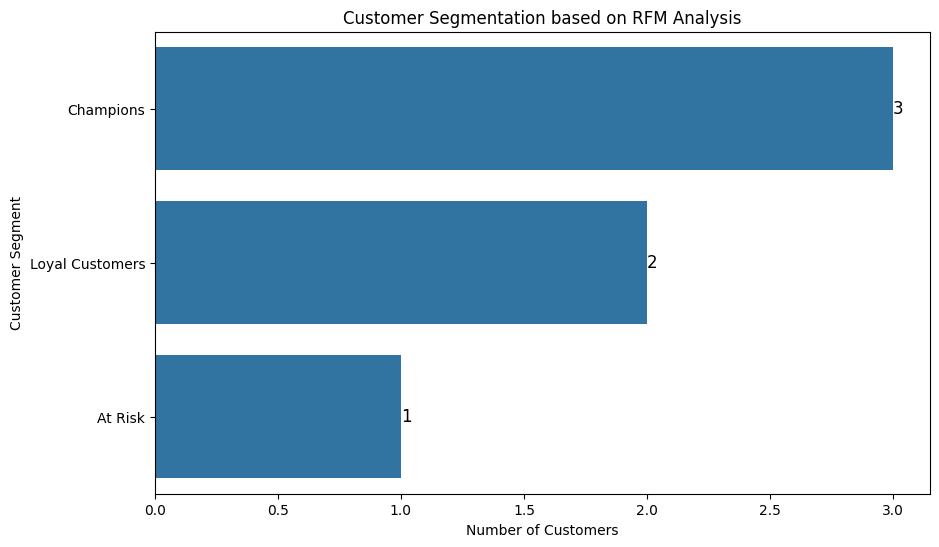

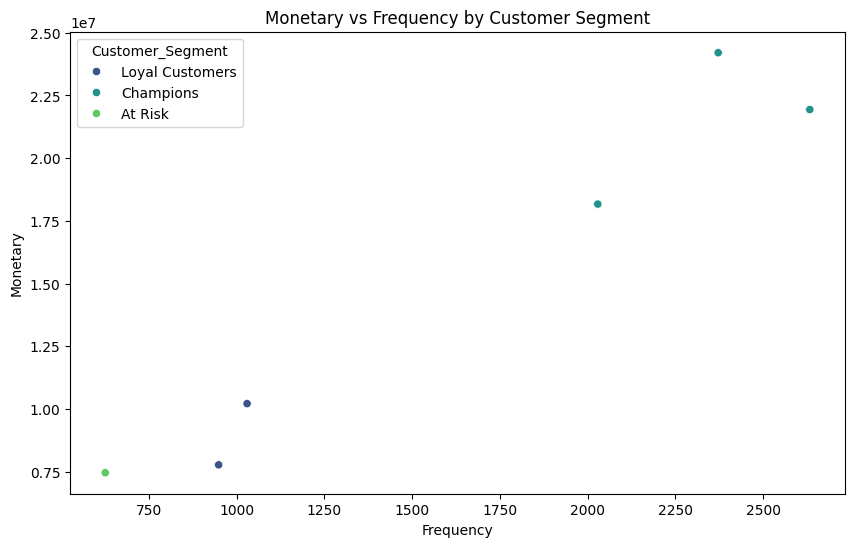

In [249]:
# Visualize the RFM Segmentation
plt.figure(figsize=(10, 6))
#count of segments
ax=sns.countplot(data=rfm, y='Customer_Segment', order=rfm['Customer_Segment'].value_counts().index)
plt.title('Customer Segmentation based on RFM Analysis')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
for p in ax.patches:
    count = int(p.get_width())
    ax.annotate(f'{count}', (count, p.get_y() + p.get_height() / 2),
                va='center', ha='left', fontsize=12, color='black')
plt.show()

#monetary vs frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Customer_Segment', palette='viridis')
plt.title('Monetary vs Frequency by Customer Segment')  
plt.show()

***📝 Insight:***
- ✅A significant portion of customers fall into LOYAL or CHAMPION segments, which are the high-value clients.
- ✅A noticeable chunk in AT RISK means there's room for re-engegement strategies(emails,loyalty programs).
- ✅CHAMPIONS have high frequency and high spend, making them key drivers of business growth.
- ✅This segmentation helps prioritize marketing and sales efforts at the retailer level.
<hr style="border:0.2px dashed white">

**5.2 Distribution of Total Sales**
- This plot displays the overall distribution of total sales values in the dataset.  
It helps to understand the spread, frequency of sales amounts, and detect any skewness.

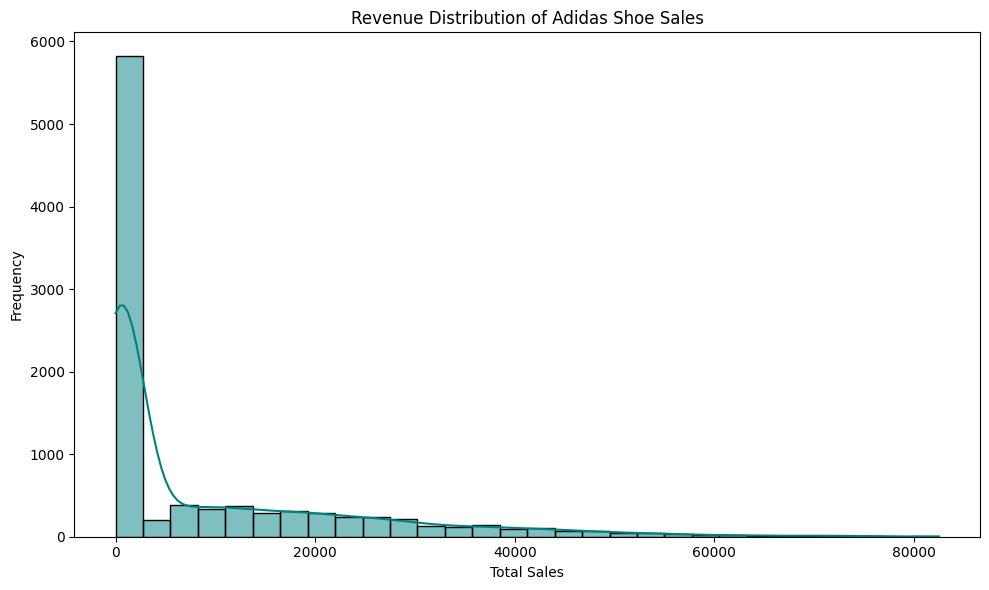

In [250]:
## Revenue Distribution
plt.figure(figsize=(10, 6))
sns.histplot(adidas_df['Total_Sales'], bins=30, kde=True,color='teal')
plt.title('Revenue Distribution of Adidas Shoe Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

***📝 Insight:***
- ✅The majority of sales transactions are in the lower to mid range values.
- ✅There are few outlier transactions with very high revenue, which could indicate bulk orders or special deals.
<hr style="border:.2px dashed white">

**5.3 Revenue by Region**
- This bar chart represents the total revenue generated in each region.  
It provides a comparative view of how different regions contribute to overall sales.

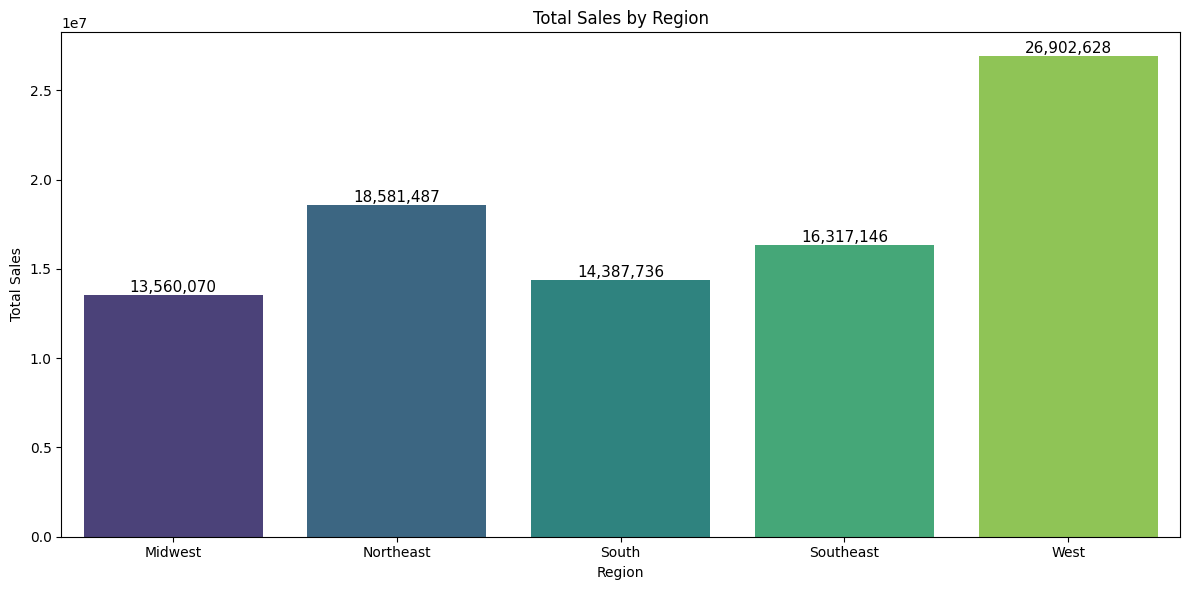

In [251]:
#revenue by Region
plt.figure(figsize=(12, 6))
region_sales= adidas_df.groupby('Region')['Total_Sales'].sum().reset_index()
ax=sns.barplot(data=region_sales, x='Region', y='Total_Sales',hue='Region',legend=False, palette='viridis')
plt.title('Total Sales by Region')  
plt.xlabel('Region')
plt.ylabel('Total Sales')
for p in ax.patches:
    value = int(p.get_height())
    ax.annotate(f'{value:,}', (p.get_x() + p.get_width() / 2, value),
                ha='center', va='bottom', fontsize=11, color='black')
plt.tight_layout()
plt.show()

***📝 Insight:***
- ✅Certain regions clearly dominate revenue(West and NorthEast).
- ✅Regions with lower revenue might need targeted marketing or sales effort.
- ✅Regional focus could help in resource allocation for future campaigns.
<hr style="border:.2px dashed white">

**5.4 Monthly / Seasonal Sales Trends**
- This time series plot illustrates how total sales vary over months.  
It gives an overview of seasonal patterns or fluctuations in sales over time.

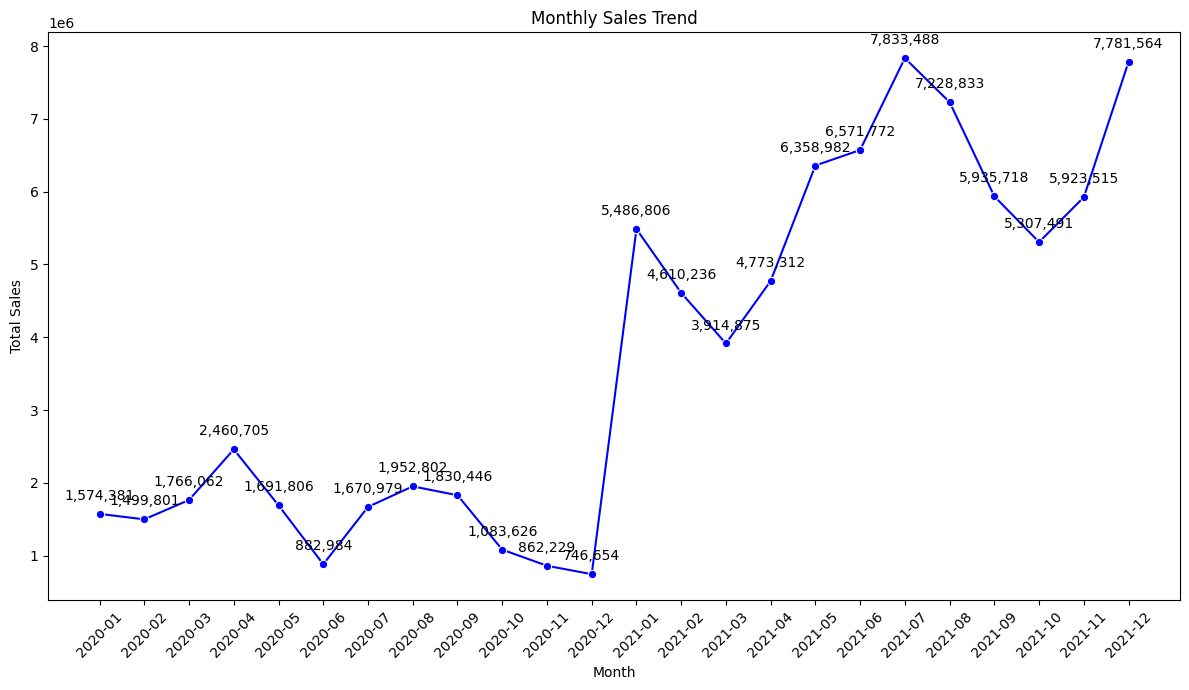

In [252]:
#Monthly Sales Trend
plt.figure(figsize=(12, 7))
monthly_sales=adidas_df.groupby(adidas_df['Invoice_Date'].dt.to_period('M'))['Total_Sales'].sum().reset_index()
monthly_sales['Invoice_Date'] = monthly_sales['Invoice_Date'].astype(str)
ax=sns.lineplot(data=monthly_sales, x='Invoice_Date', y='Total_Sales', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
for i, row in monthly_sales.iterrows():
    ax.annotate(f"{row['Total_Sales']:,}", (row['Invoice_Date'], row['Total_Sales']),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***📝 Insight:***
- ✅Sales show a rising trend in particular Month(eg: Q2 and Q4 spikes, possibly due to holiday seasons or promotions).
- ✅Some months show dips-these could be opportunities for seaosnal campaigns or discounts to drive engagement.
<hr style="border:.2px dashed white">

**5.5 Correlation Heatmap of Numerical Features**
- This heatmap shows correlation coefficients between numerical variables in the dataset.  
It helps to identify relationships or dependencies between different metrics.

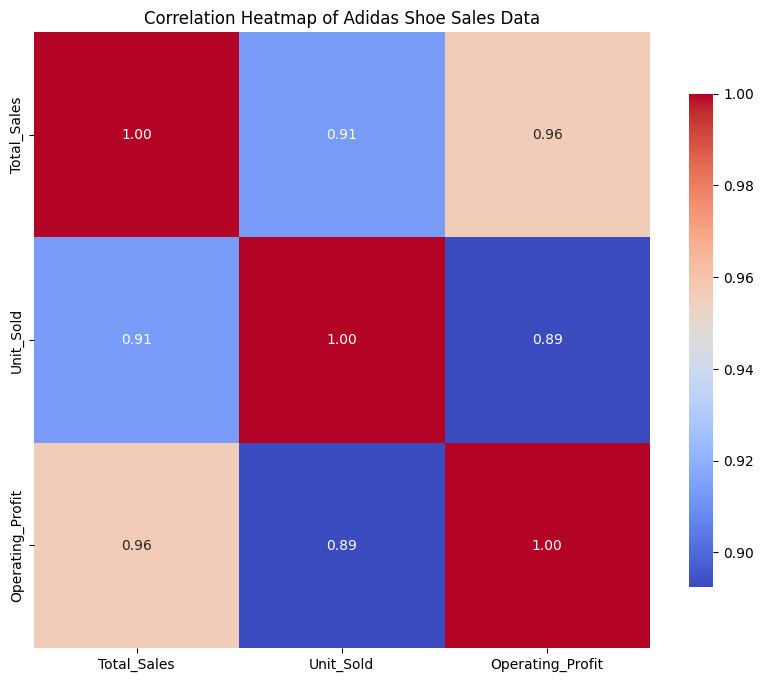

In [253]:
# Correlation Heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(adidas_df[['Total_Sales','Unit_Sold','Operating_Profit']].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Adidas Shoe Sales Data')
plt.show()

***📝 Insight:***
- ✅Total Sales & Units Sold: Strong +ve correlation(0.91)-> More Units Sold drives higher revenue.
- ✅Total Sales & Operating Profit: Very strong +ve correlation(0.96)-> Revenue growth strongly impacts profit.
- ✅Units Sold & Operating Profit: Strong +ve correlation(0.89)-> Selling more units contributes to profit, though less directly than revenue.
<hr style="border:2px solid blue">

# ✅ Final Conclusion

- **Top Products:** Men Street Footwear leads with ~$2.88M.
- **Top Regions:** West region dominates with ~$2.69M revenue.
- **Seasonality:** Sales peaked in mid‑2021 (June–August).
- **Top Retailers:** West Gear and Foot Locker are key drivers.
- **RFM Segmentation:** Many Champion and Loyal customers drive most revenue.

**Recommendation:** Focus marketing on high-performing regions and champion customers, while re‑engaging at‑risk segments to boost sales.

In [5]:
# Save the cleaned DataFrame to a new CSV file
adidas_df.to_csv('Cleaned_Adidas_Shoe_Sales.csv', index=False)